In [20]:
import os
import yt
import sys
import h5py as h5
import numpy as np
import scipy as sp

output_directory = os.path.join('outputs')
input_snapshot = 'parthenon.prim.00049.phdf'

def get_fields(filename):
    """ Function information here. """
    ds = yt.load(os.path.join(output_directory, filename))

    print('>> [Field] Gas:')
    for elem in dir(ds.fields.gas):
        print(elem)
    print('\n>> [Field] Index:')
    for elem in dir(ds.fields.index):
        print(elem)
    print('\n>> [Field] Parthenon:')
    for elem in dir(ds.fields.parthenon):
        print(elem)

    # # Print things in a more human-friendly manner: one temperature at a time
    # print("(x,  y,  z) Temperature")
    # print("-----------------------")
    # for i in range(sp["gas", "temperature"].size):
    #     print(
    #         "(%f,  %f,  %f)    %f"
    #         % (
    #             sp["gas", "x"][i],
    #             sp["gas", "y"][i],
    #             sp["gas", "z"][i],
    #             sp["gas", "temperature"][i],
    #         )
    #     )


def get_integral_time(filename):
    """ Function information here. """
    ds = yt.load(os.path.join(output_directory, filename))
    # ad = ds.all_data()
    # sp = ds.sphere([0, 0, 0], 0.01)

    cg = ds.covering_grid(
        0,
        ds.domain_left_edge,
        ds.domain_dimensions
    )

    yt.SlicePlot(ds, "x", ("gas", "mach_number")).show()
    yt.SlicePlot(ds, "x", ("gas", "sound_speed")).show()

yt : [WARNING  ] 2023-10-13 13:19:18,064 Plasma composition could not be determined in data file. Falling back to fully ionized primodial composition.
yt : [WARNING  ] 2023-10-13 13:19:18,066 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-10-13 13:19:18,071 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-10-13 13:19:18,073 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2023-10-13 13:19:18,166 Parameters: current_time              = 9.800507663062113
yt : [INFO     ] 2023-10-13 13:19:18,168 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-13 13:19:18,170 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-13 13:19:18,172 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [ERROR    ] 2023-10-13 13:19:18,174 Missing cosmological_simulation in parameter file definition!


yt : [INFO     ] 2023-10-13 13:19:20,213 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:20,214 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:20,221 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:20,223 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:20,233 Making a fixed resolution buffer of (('gas', 'mach_number')) 800 by 800



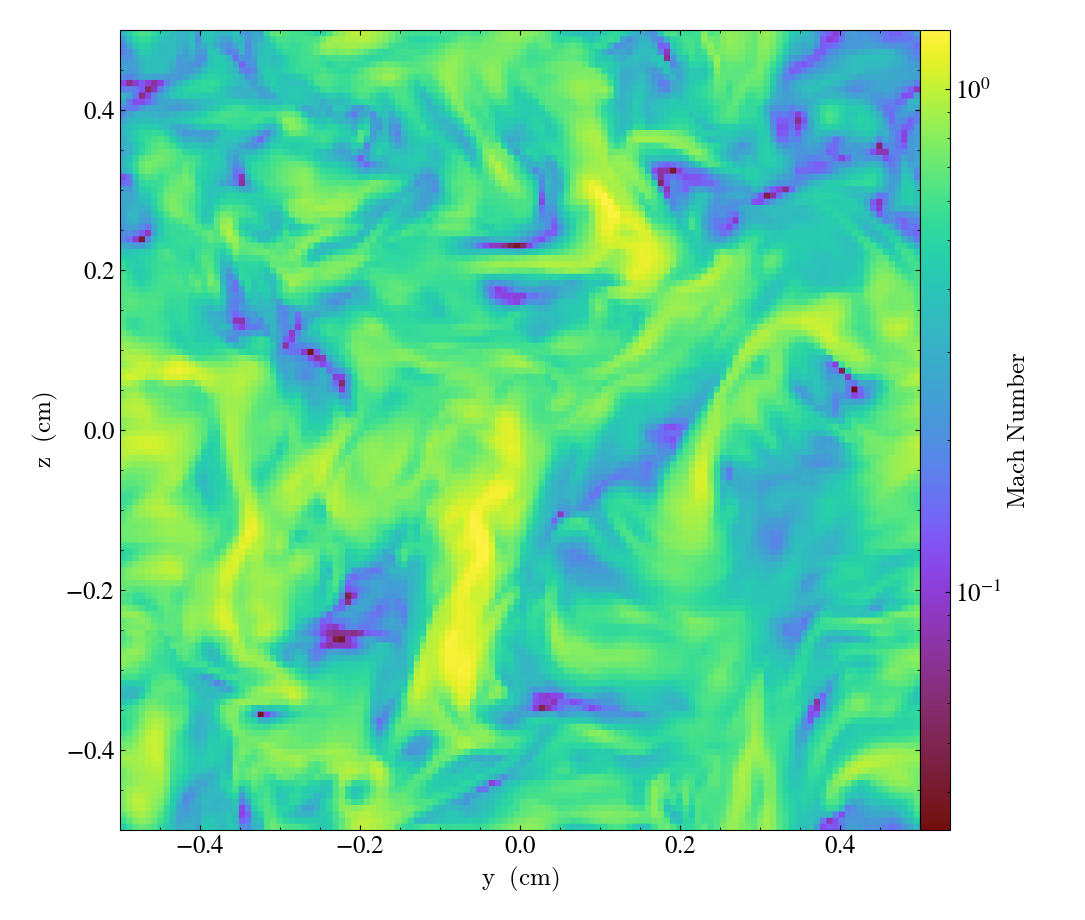

yt : [INFO     ] 2023-10-13 13:19:21,388 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:21,390 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:21,405 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:21,406 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-10-13 13:19:21,412 Making a fixed resolution buffer of (('gas', 'sound_speed')) 800 by 800



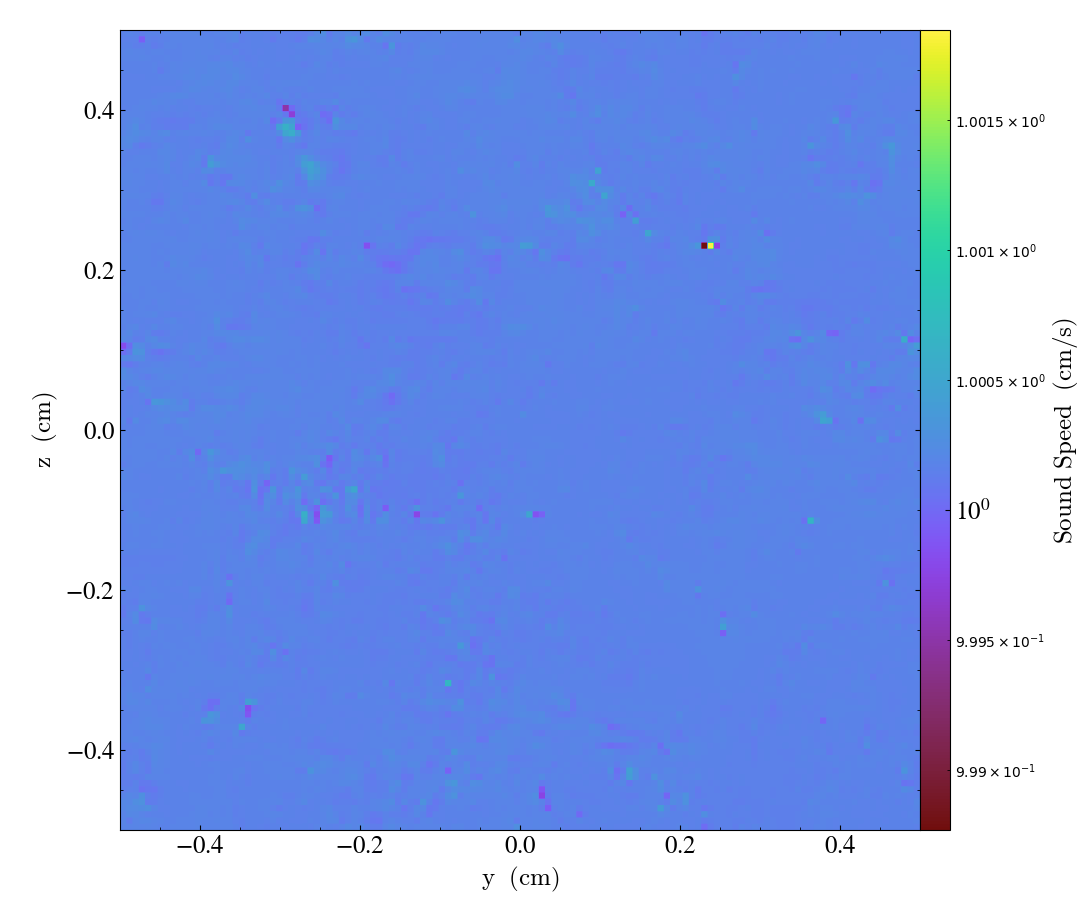

In [21]:
get_integral_time(input_snapshot)

In [11]:
get_fields(input_snapshot)

yt : [WARNING  ] 2023-10-13 13:02:42,103 Plasma composition could not be determined in data file. Falling back to fully ionized primodial composition.
yt : [WARNING  ] 2023-10-13 13:02:42,104 Assuming 1.0 = 1.0 cm
yt : [WARNING  ] 2023-10-13 13:02:42,106 Assuming 1.0 = 1.0 s
yt : [WARNING  ] 2023-10-13 13:02:42,108 Assuming 1.0 = 1.0 g
yt : [INFO     ] 2023-10-13 13:02:42,220 Parameters: current_time              = 9.800507663062113
yt : [INFO     ] 2023-10-13 13:02:42,221 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2023-10-13 13:02:42,228 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-13 13:02:42,230 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [ERROR    ] 2023-10-13 13:02:42,232 Missing cosmological_simulation in parameter file definition!


>> [Field] Gas:
alfven_speed
angular_momentum_magnitude
angular_momentum_x
angular_momentum_y
angular_momentum_z
averaged_density
baroclinic_vorticity_magnitude
baroclinic_vorticity_x
baroclinic_vorticity_y
baroclinic_vorticity_z
cell_mass
cell_volume
courant_time_step
cutting_plane_magnetic_field_x
cutting_plane_magnetic_field_y
cutting_plane_magnetic_field_z
cutting_plane_velocity_x
cutting_plane_velocity_y
cutting_plane_velocity_z
density
density_gradient_magnitude
density_gradient_x
density_gradient_y
density_gradient_z
dx
dy
dynamical_time
dz
four_velocity_magnitude
four_velocity_t
four_velocity_x
four_velocity_y
four_velocity_z
jeans_mass
kT
kinetic_energy_density
lorentz_factor
mach_alfven
mach_number
magnetic_energy_density
magnetic_field_cylindrical_radius
magnetic_field_cylindrical_theta
magnetic_field_cylindrical_z
magnetic_field_divergence
magnetic_field_divergence_absolute
magnetic_field_los
magnetic_field_magnitude
magnetic_field_poloidal
magnetic_field_poloidal_magnitude